In [8]:
import matplotlib.pyplot as plt
import csv

In [ ]:
# 밤 11시에 사람들이 가장 많이 타는 역 찾기
f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header = next(data) # header 변수에 헤더 저장
next(data)  # 헤더 제외

max_people = 0
max_station = ''
t = int(input(' 몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : '))

for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
    
    row[4:] = map(int, row[4:])
    people = row[2 * t - 4]
    if people > max_people:
        max_people = people
        max_station = row[3] +'(' + row[1] +')'
f.close()

print(f"{t}시 승차 인원이 가장 많은 역은 {max_station}이고 {max_people}명 입니다.")

11시 승차 인원이 가장 많은 역은 잠실(송파구청)(2호선)이고 76852명 입니다.


['구로(4)', '신림(5)', '신림(6)', '신림(7)', '신림(8)', '신림(9)', '신림(10)', '잠실(송파구청)(11)', '잠실(송파구청)(12)', '강남(13)', '강남(14)', '강남(15)', '강남(16)', '강남(17)', '강남(18)', '강남(19)', '잠실(송파구청)(20)', '강남(21)', '강남(22)', '홍대입구(23)', '강남(0)', '금정(1)', '동암(2)', '용산(3)']
[11898, 38345, 71039, 184073, 274665, 165979, 88153, 76852, 84468, 98834, 106471, 131677, 154492, 241721, 321759, 197282, 153516, 177679, 167850, 81164, 14129, 29, 2, 1]


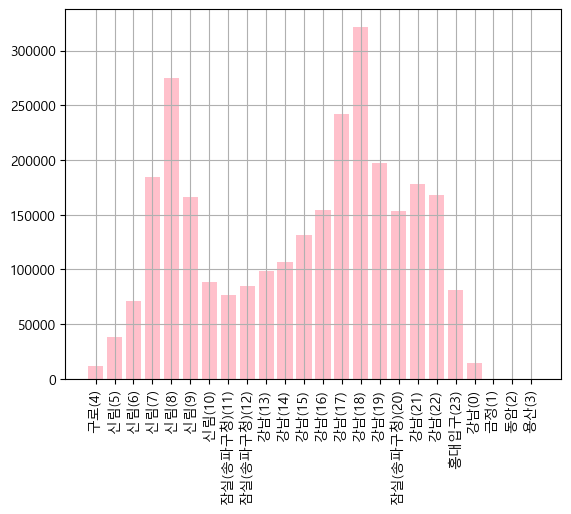

In [13]:
 # 시간대별 최대 승차 역 이름 및 승차 인원 출력하기
f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)
header =next(data)
next(data)

max_people = [0] * 24 # 시간대별 최대 승차 인원
max_station = [''] * 24 # 시간대별 최대 승차 인원을 가진 역 이름

for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
    
    row[4:] = map(int, row[4:])
    for j in range(24):
        people = row[2 * j + 4] # 시간대별 승차 인원
        if people > max_people[j]: # 시간대별 최대 승차 인원을 가진 역 이름
            max_people[j] = people # 시간대별 최대 승차 인원
            max_station[j] = row[3] + f'({str((j+4) % 24)})' # 시간대별 최대 승차 인원을 가진 역 이름

f.close()

print(max_station)
print(max_people)

plt.rc('font', family='Malgun Gothic')

plt.bar(range(24), max_people, color = 'pink')
plt.xticks(range(24), max_station, rotation = 90)
plt.grid(True)
plt.show()


    
    

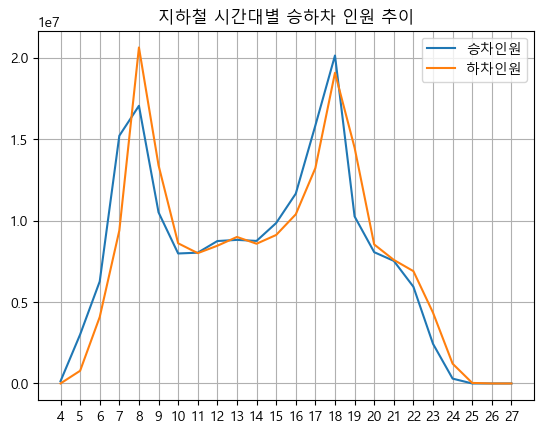

In [16]:
# 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면

f = open('subwaytime.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)
next(data)

s_in = [0] * 24
s_out = [0] * 24

for row in data:
    for i in range(4, 52):
        row[i] = row[i].replace(',', '')
    
    row[4:] = map(int, row[4:])
    for i in range(24):
        s_in[i] = s_in[i] + row[2 * i +4]
        s_out[i] = s_out[i] + row[2 * i +5]


f.close()    

plt.rc('font', family='Malgun Gothic')
plt.title("지하철 시간대별 승하차 인원 추이")
plt.plot(s_in, label = '승차인원')
plt.plot(s_out, label = '하차인원')
plt.legend()
plt.grid(True)
plt.xticks(range(24), range(4,28))
plt.show()

In [29]:
# 유무임 승하차 인원이 가장 많은 역 찾기
f = open('subwayfee.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)


max_people = [0 for _ in range(4)]
max_station = ['' for _ in range(4)]

# index = 4, 5, 6, 7
label = ['유임승차', '유임하차', '무임승차', '무임하차']


for row in data:
    for i in range(4, 8):
        row[i] = int(row[i].replace(',', ''))
        if row[i] > max_people[i-4]: # i-4는 index를 맞추기 위한 것
            max_people[i-4] = row[i] 
            max_station[i-4] = row[3]

f.close()

for i in range(4):
    print(f'{label[i]}가 가장 많은 역은 {max_station[i]}이고 {max_people[i]}명 입니다.')
               

유임승차가 가장 많은 역은 잠실(송파구청)이고 2106912명 입니다.
유임하차가 가장 많은 역은 홍대입구이고 2210524명 입니다.
무임승차가 가장 많은 역은 종로3가이고 318029명 입니다.
무임하차가 가장 많은 역은 제기동이고 303921명 입니다.


In [ ]:
f = open('subwayfee.csv', encoding='cp949')
data = csv.reader(f)

header = next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']
color = ['red', 'blue', 'green', 'yellow']

plt.rc('font', family='Malgun Gothic')
for row in data:
    for i in range(4, 8):
        row[i] = int(row[i].replace(',', ''))
    
    plt.title(row[3] + ' ' + row[1])
    plt.pie(row[4:8], labels =label, colors=color, autopct='%.1f%%')
    plt.show()

f.close()